In this short post, we will explore a problem recently submitted to me by one of my roommates, and an approximate solution to the problem.

The problem is as follows: given a set of $n$ points, can you find $k$ points among them that are chosen such that they are farthest apart from each other? 

This is a very general problem, to which a short search I did not find any "optimal" or classical solution, although there must exist some. Instead, we will implement the algorithm that my roommate has come up with to find an approximate solution.

We will follow the advice of Peter Norvig (from his wonderful post on the [travelling salesman problem](http://nbviewer.ipython.org/url/norvig.com/ipython/TSPv3.ipynb)):

>In general our design philosophy is to first write an English description of the algorithm, then write Python code that closely mirrors the English description. This will probably require some auxilliary functions and data structures; just assume they exist; put them on a TO DO list, and eventually define them with the same design philosophy.

We will consider the problem in the frame of points in the 2D plane and found in the range $[-1, 1]^2$. We will represent these points using the complex number type available in Python (just like Peter Norvig does it).

Our first requirement will be to plot a list of points. We can write the following function for this.

In [179]:
# necesarry imports
%matplotlib inline
import matplotlib.pyplot as plt

In [180]:
def plot_points(points, ax=None, style={'marker': 'o', 'color':'b'}):
    """plots a set of points, with optional arguments for axes and style"""
    if ax==None:
        ax = plt.gca()
    for p in points:
        ax.plot(p.real, p.imag, **style)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

We will examine two types of datasets:

- points distributed on a unit circle
- points distributed randomly in the [-1, 1]^2 interval

We write functions for both datasets below:

In [153]:
import math

In [154]:
def create_circle_points(n):
    """creates a list of n points on a circle of radius one"""
    return [math.cos(2 * math.pi * i / float(n)) + \
            1j * math.sin(2 * math.pi * i / float(n)) for i in range(n)]

In [181]:
def create_point_cloud(n):
    return [2 * random.random() - 1 + 1j * (2 * random.random() - 1) for _ in range(n)]

Let's test these two datasets with our plotting function:

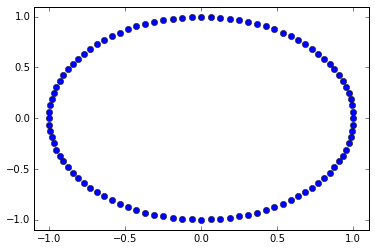

In [189]:
circle100 = create_circle_points(100)
plot_points(circle100)

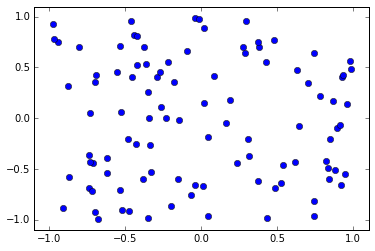

In [182]:
cloud100 = create_point_cloud(100)
plot_points(cloud100)

Now, we will turn to our problem: can we find $k$ points that are as far possible apart from each other?

Our approximate algorithm will work as follows:

- choose one point at random as a starting point
- add the farthest point from the remaining points to the solution set
- do this until we have reached $k$ points in the solution set

In [159]:
import random

In [165]:
def incremental_farthest_search(points, k):
    remaining_points = points[:]
    solution_set = []
    solution_set.append(remaining_points.pop(\
                                             random.randint(0, len(remaining_points) - 1)))
    for _ in range(k-1):
        distances = [distance(p, solution_set[0]) for p in remaining_points]
        for i, p in enumerate(remaining_points):
            for j, s in enumerate(solution_set):
                distances[i] = min(distances[i], distance(p, s))
        solution_set.append(remaining_points.pop(distances.index(max(distances))))
    return solution_set

#TODO: function distance

We now define a distance function (the absolute value of the difference of two complex numbers returns the distance between them).

In [166]:
def distance(A, B):
    return abs(A - B)

Now, let's run the algorithm:

In [190]:
incremental_farthest_search(circle100, 2)

[(0.8763066800438631-0.4817536741017161j),
 (-0.8763066800438636+0.4817536741017152j)]

Let's plot the result of the algorithm.

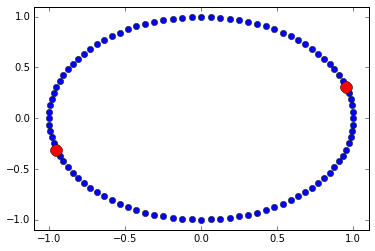

In [191]:
plot_points(circle100)
plot_points(incremental_farthest_search(circle100, 2), style={'marker': 'o', 'color':'r', 'markersize': 12})

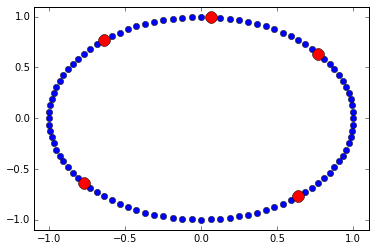

In [193]:
plot_points(circle100)
plot_points(incremental_farthest_search(circle100, 5), style={'marker': 'o', 'color':'r', 'markersize': 12})

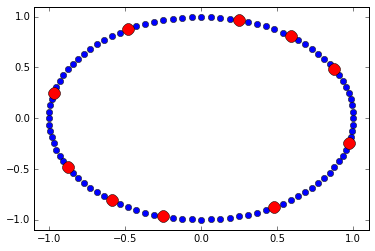

In [192]:
plot_points(circle100)
plot_points(incremental_farthest_search(circle100, 10), style={'marker': 'o', 'color':'r', 'markersize': 12})

Due to the random initialization, this will return different solutions to the problem if we run it multiple times.

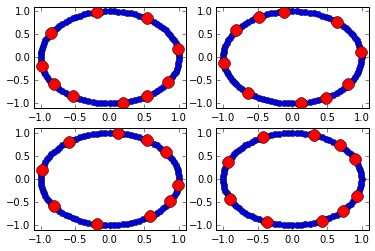

In [200]:
fig, axes = plt.subplots(2, 2)
for ax in axes.ravel():
    plot_points(circle100, ax=ax)
    plot_points(incremental_farthest_search(circle100, 10), 
                ax=ax, 
                style={'marker': 'o', 'color':'r', 'markersize': 12})

How does this extend to a point cloud?

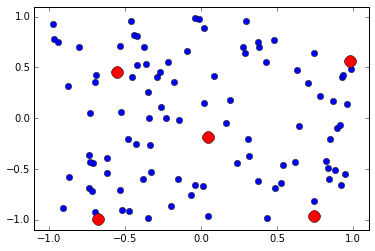

In [187]:
plot_points(cloud100)
plot_points(incremental_farthest_search(cloud100, 5), style={'marker': 'o', 'color':'r', 'markersize': 12})

Again, we can see how this compares when we do it multiple times:

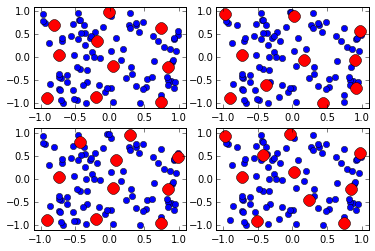

In [202]:
fig, axes = plt.subplots(2, 2)
for ax in axes.ravel():
    plot_points(cloud100, ax=ax)
    plot_points(incremental_farthest_search(cloud100, 10), 
                ax=ax, 
                style={'marker': 'o', 'color':'r', 'markersize': 12})

In fact, we can compare the different solutions using an animation.

In [174]:
from JSAnimation import IPython_display
from matplotlib import animation


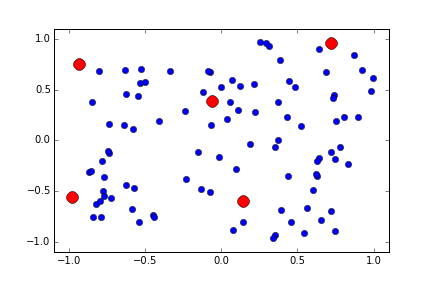
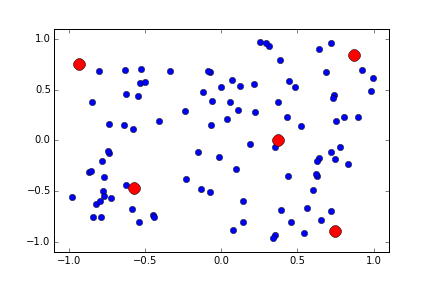
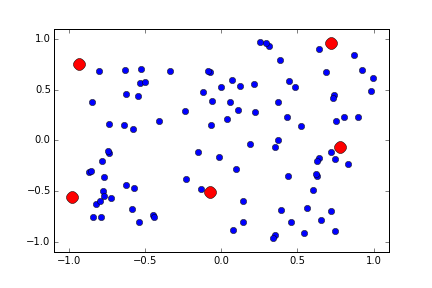
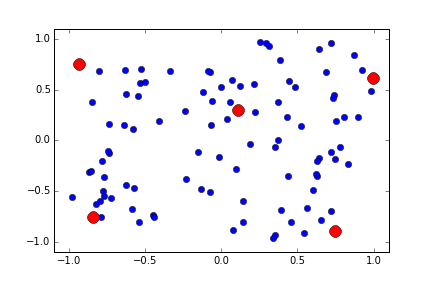
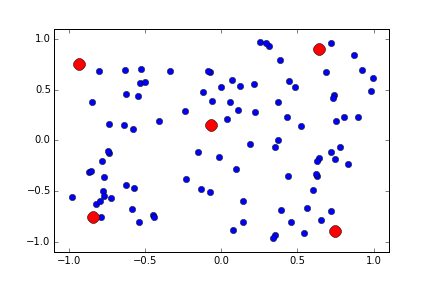
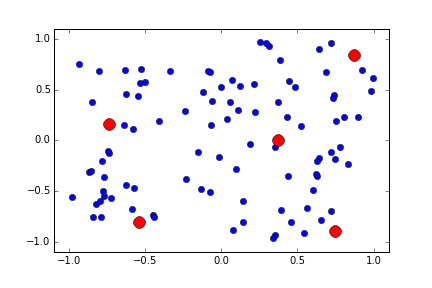
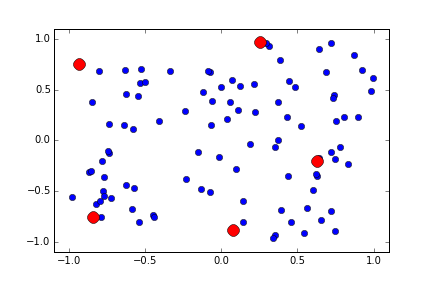
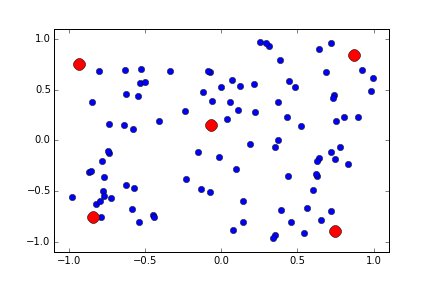
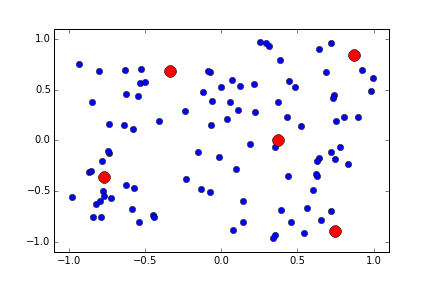
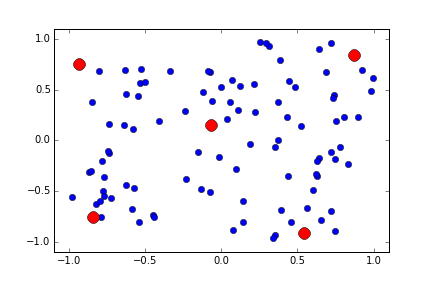

In [178]:
fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(-1, 1))

def init():
    return

def animate(i):
    ax.cla()
    plot_points(cloud100, ax=ax)
    plot_points(incremental_farthest_search(cloud100, 5), 
                ax=ax, 
                style={'marker': 'o', 'color':'r', 'markersize': 12})

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=10, interval=100, blit=False)

Based on the previous implementation, we can define a criterion to distinguish between solutions and find the best among a given set of solutions. We choose the sum of the distances between the candidate solutions.

In [203]:
def evaluate_solution(solution_set):
    return sum([distance(a, b) for a, b in zip(solution_set[:-1], solution_set[1:])])

In the case of the circle, the optimal solution can be shown to be:

$$
(n-1) \sqrt{(\cos{\frac{2\pi}{n}} - 1)^2 + (\sin{\frac{2\pi}{n}})^2}
$$

In [240]:
def optimal_circle_solution(n):
    return (n - 1) * math.sqrt((math.cos(2 * math.pi / n) - 1)**2 + \
                         math.sin(2 * math.pi / n)**2)

We can check that the solution is correct for a few test cases (2 and 4 are easy).

In [241]:
optimal_circle_solution(2)

2.0

2.0

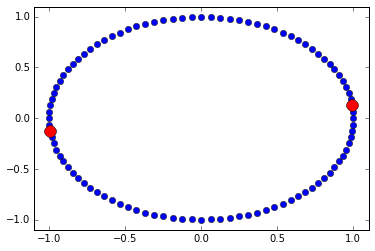

In [289]:
plot_points(circle100)
sol = incremental_farthest_search(circle100, 2)
plot_points(sol, style={'marker': 'o', 'color':'r', 'markersize': 12})
evaluate_solution(sol)

In [242]:
optimal_circle_solution(4)

4.242640687119285

5.414213562373095

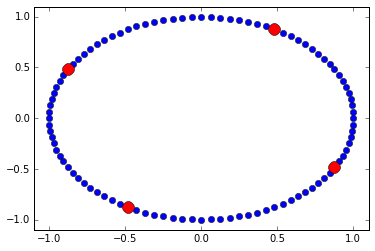

In [304]:
plot_points(circle100)
sol = incremental_farthest_search(circle100, 4)
plot_points(sol, style={'marker': 'o', 'color':'r', 'markersize': 12})
evaluate_solution(sol)

What about our test case, 10?

In [307]:
optimal_circle_solution(10)

5.562305898749054

12.811589676502912

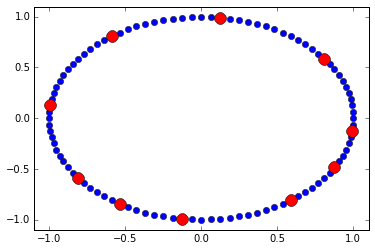

In [314]:
plot_points(circle100)
sol = incremental_farthest_search(circle100, 10)
plot_points(sol, style={'marker': 'o', 'color':'r', 'markersize': 12})
evaluate_solution(sol)

We can define a better solution by running the algorithm several times and keeping the one that minimizes the criterion above:

In [318]:
def best_solution(points, k, tries):
    solution_sets = [incremental_farthest_search(points, k) for _ in range(tries)]
    sorted_solutions = sorted(solution_sets, key=evaluate_solution, reverse=False)
    return sorted_solutions[0]

12.18068388836029

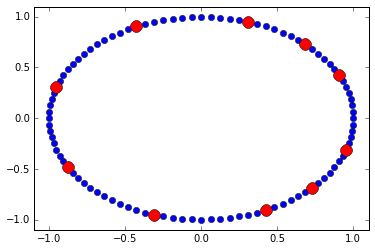

In [323]:
plot_points(circle100)
sol = best_solution(circle100, 10, 100)
plot_points(sol,
           style={'marker': 'o', 'color':'r', 'markersize': 12})
evaluate_solution(sol)

To conclude this post, we can only say that this exploration was fun but very limited. 
In fact, we haven't even considered finding the real optimal solution due to the fact that the problem explodes in terms of combinatorial optimization; we only used one approximate algorithm for finding a solution.
I believe this algorithm behaves quite well for point clouds, but we can observe that for circle patterns, the solution will not be optimal, as is seen in the previous figure: by prematurely choosing greedy points, we cannot find equilibrium configurations with nicely distributed points.

This post was entirely written using the IPython notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20150716_FarthestNeighbors.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20150716_FarthestNeighbors.ipynb).